### Lab 3: Expectation Maximization and Variational Autoencoder

### Machine Learning 2 (2017/2018)

* The lab exercises should be made in groups of two or three people.
* The deadline is Friday, 01.06.
* Assignment should be submitted through BlackBoard! Make sure to include your and your teammates' names with the submission.
* Attach the .IPYNB (IPython Notebook) file containing your code and answers. Naming of the file should be "studentid1\_studentid2\_lab#", for example, the attached file should be "12345\_12346\_lab1.ipynb". Only use underscores ("\_") to connect ids, otherwise the files cannot be parsed.

Notes on implementation:

* You should write your code and answers in an IPython Notebook: http://ipython.org/notebook.html. If you have problems, please ask.
* Use __one cell__ for code and markdown answers only!
    * Put all code in the cell with the ```# YOUR CODE HERE``` comment and overwrite the ```raise NotImplementedError()``` line.
    * For theoretical questions, put your solution using LaTeX style formatting in the YOUR ANSWER HERE cell.
* Among the first lines of your notebook should be "%pylab inline". This imports all required modules, and your plots will appear inline.
* Large parts of you notebook will be graded automatically. Therefore it is important that your notebook can be run completely without errors and within a reasonable time limit. To test your notebook before submission, select Kernel -> Restart \& Run All.
$\newcommand{\bx}{\mathbf{x}} \newcommand{\bpi}{\mathbf{\pi}} \newcommand{\bmu}{\mathbf{\mu}} \newcommand{\bX}{\mathbf{X}} \newcommand{\bZ}{\mathbf{Z}} \newcommand{\bz}{\mathbf{z}}$

### Installing PyTorch

In this lab we will use PyTorch. PyTorch is an open source deep learning framework primarily developed by Facebook's artificial-intelligence research group. In order to install PyTorch in your conda environment go to https://pytorch.org and select your operating system, conda, Python 3.6, no cuda. Copy the text from the "Run this command:" box. Now open a terminal and activate your 'ml2labs' conda environment. Paste the text and run. After the installation is done you should restart Jupyter.

### MNIST data

In this Lab we will use several methods for unsupervised learning on the MNIST dataset of written digits. The dataset contains digital images of handwritten numbers $0$ through $9$. Each image has 28x28 pixels that each take 256 values in a range from white ($= 0$) to  black ($=1$). The labels belonging to the images are also included. 
Fortunately, PyTorch comes with a MNIST data loader. The first time you run the box below it will download the MNIST data set. That can take a couple of minutes.
The main data types in PyTorch are tensors. For Part 1, we will convert those tensors to numpy arrays. In Part 2, we will use the torch module to directly work with PyTorch tensors.

In [1]:
%pylab inline
import torch
from torchvision import datasets, transforms

train_dataset = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

train_labels = train_dataset.train_labels.numpy()
train_data = train_dataset.train_data.numpy()
# For EM we will use flattened data
train_data = train_data.reshape(train_data.shape[0], -1)


Populating the interactive namespace from numpy and matplotlib


## Part 1: Expectation Maximization
We will use the Expectation Maximization (EM) algorithm for the recognition of handwritten digits in the MNIST dataset. The images are modelled as a Bernoulli mixture model (see Bishop $\S9.3.3$):
$$
p(\bx|\bmu, \bpi) = \sum_{k=1}^K  \pi_k \prod_{i=1}^D \mu_{ki}^{x_i}(1-\mu_{ki})^{(1-x_i)}
$$
where $x_i$ is the value of pixel $i$ in an image, $\mu_{ki}$ represents the probability that pixel $i$ in class $k$ is black, and $\{\pi_1, \ldots, \pi_K\}$ are the mixing coefficients of classes in the data. We want to use this data set to classify new images of handwritten numbers.

### 1.1 Binary data (5 points)
As we like to apply our Bernoulli mixture model, write a function `binarize` to convert the (flattened) MNIST data to binary images, where each pixel $x_i \in \{0,1\}$, by thresholding at an appropriate level.

In [2]:
def binarize(X):
    ######################## ######################## ########################
    # YOUR CODE HERE
    
    X_ = np.around(X.astype(np.double)/255)
    return X_

In [3]:
# Test test test!
bin_train_data = binarize(train_data)
assert bin_train_data.dtype == np.float
assert bin_train_data.shape == train_data.shape


Sample a few images of digits $2$, $3$ and $4$; and show both the original and the binarized image together with their label.





plotting label 2:

... float


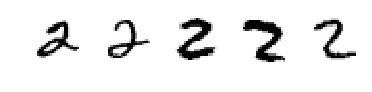

... binary


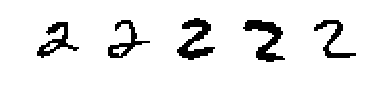





plotting label 3:

... float


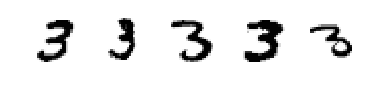

... binary


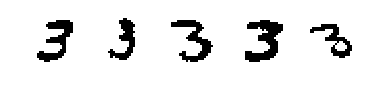





plotting label 4:

... float


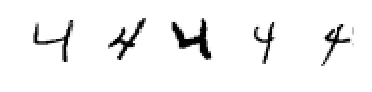

... binary


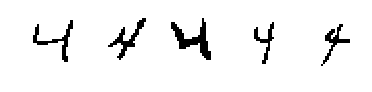

In [4]:
# YOUR CODE HERE
######################## ######################## ########################

def plot_MNIST_digits(data):
    
    i = data.shape[0]
    
    for j in range(i):
        plt.subplot(1,i,j+1)
        plt.imshow(data[j].reshape(28,28), interpolation = 'nearest',
                   cmap ='Greys')
        plt.axis('off')
    plt.show()


def plot_bin_MNIST_digits(digits, bin_train_data, train_labels, train_data):
    
    for digit in digits:

        print('\n\n'+'='*50+'\n\n')
        print('plotting label {}:\n'.format(digit))

        bin_zip = zip(bin_train_data, train_labels)
        float_zip = zip(train_data, train_labels)
        bin_   = np.array([i for i,n in bin_zip if n == digit])
        float_ = np.array([i for i,n in float_zip if n == digit])

        print('... float')
        plot_MNIST_digits(np.vstack((float_[0:5])))

        print('... binary')
        plot_MNIST_digits(np.vstack((bin_[0:5])))

    print('\n\n'+'='*50+'\n\n')


plot_bin_MNIST_digits([2,3,4], bin_train_data, train_labels, train_data)

######################## ######################## ########################

### 1.2 Implementation (40 points)
You are going to write a function ```EM(X, K, max_iter)``` that implements the EM algorithm on the Bernoulli mixture model. 

The only parameters the function has are:
* ```X``` :: (NxD) array of input training images
* ```K``` :: size of the latent space
* ```max_iter``` :: maximum number of iterations, i.e. one E-step and one M-step

You are free to specify your return statement.

Make sure you use a sensible way of terminating the iteration process early to prevent unnecessarily running through all epochs. Vectorize computations using ```numpy``` as  much as possible.

You should implement the `E_step(X, mu, pi)` and `M_step(X, gamma)` separately in the functions defined below. These you can then use in your function `EM(X, K, max_iter)`.

In [5]:
def E_step(X, mu, pi):
    
    # YOUR CODE HERE
    ######################## ######################## ########################
       
    # expand X over axis 1 which gives us from (NxD) for X to (Nx1xD) for X_ 
    X_ = np.expand_dims(X,axis=1)
    
    # calculate unnormalized gamma 
    g = pi*np.prod(mu**X_ * (1-mu)**(1-X_), axis=2)
    
    # calculate normalization and expend it from N to Nx1
    normal = np.expand_dims(np.sum(g,axis=1),axis = 1)
    
    # get normalized gamma and handle devision by zero
    gamma = np.divide(g, normal, out=np.zeros_like(g), where=normal!=0)
    
    ######################## ######################## ########################
    return gamma

In [6]:
# Let's test on 5 datapoints
n_test = 5
X_test = bin_train_data[:n_test]
D_test, K_test = X_test.shape[1], 10

np.random.seed(2018)
mu_test = np.random.uniform(low=.25, high=.75, size=(K_test,D_test))
pi_test = np.ones(K_test) / K_test

gamma_test = E_step(X_test, mu_test, pi_test)
assert gamma_test.shape == (n_test, K_test)


In [7]:
def M_step(X, gamma):
    
    # YOUR CODE HERE
    ######################## ######################## ########################
    
    N_k = np.sum(gamma, axis=0)    
    pi = N_k / np.sum(N_k)
    
    # we expend similar to the E-step but now over the second dimension of gamma
    X_ = np.expand_dims(X,axis=1)
    X__ = np.repeat(X_,gamma.shape[1],axis=1)
    
    # expend from Nxk to NxKx1
    gamma_ = np.expand_dims(gamma,axis=2)
    
    mu_ = np.sum(X__*gamma_,axis=0)
    
    mu = mu_/np.expand_dims(N_k,axis=1)

    ######################## ######################## ########################
    return mu, pi

In [8]:
# Oh, let's test again
mu_test, pi_test = M_step(X_test, gamma_test)

assert mu_test.shape == (K_test,D_test)
assert pi_test.shape == (K_test, )


In [9]:
import time
def EM(X, K, max_iter, mu=None, pi=None, plotting = False, threshold = 1e-1):
    
    # YOUR CODE HERE
    ######################## ######################## ########################
    
    start_total = time.time()    
    
    print('='*50+'\ninitialize EM\n')
    
    # init mu and pi if not given (reuse initialisation from above tests.)    
    if mu is None:
        mu = np.random.uniform(low=.25, high=.75, size=(K,X_test.shape[1]))
    if pi is None:
        pi = np.ones(K) / K
        
    mu_ = mu
    pi_ = pi

    if plotting:
        print('initialize mu:')
        plot_MNIST_digits(mu)
        print('='*50+'\n')
    
    
    # loop over epochs
    for i in range(max_iter):
        
        start = time.time()
        
        print('iteration {}'.format(i+1))
        
        gamma = E_step(X,mu,pi)
        mu, pi = M_step(X,gamma)
        
        # plotting latent space
        if plotting: plot_MNIST_digits(mu)
            
        # break if differences in mu and pi are small -> converged
        if all([i>0,np.linalg.norm(mu_-mu)<threshold , 
                    np.linalg.norm(pi_-pi)<threshold]):
            print('stop because of convergence after {} iterations'.format(i+1))
            break
            
        mu_ = mu 
        pi_ = pi
    
    print('\n\n'+'='*50+'\n\n{} iterations in {} min\n\n'.format(
        i+1,(time.time()-start_total)/60)+'='*50+'\n\n')
    
    return mu, pi
          
    ######################## ######################## ########################

### 1.3 Three digits experiment (10 points)
In analogue with Bishop $\S9.3.3$, sample a training set consisting of only __binary__ images of written digits $2$, $3$, and $4$. Run your EM algorithm and show the reconstructed digits.

initialize EM

initialize mu:


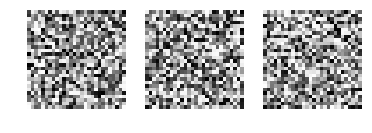


iteration 1


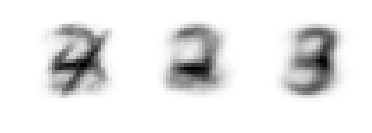

iteration 2


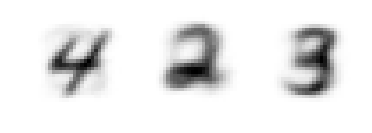

iteration 3


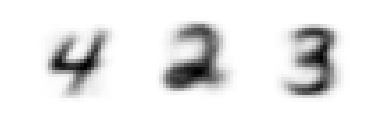

iteration 4


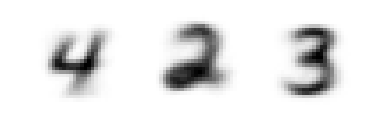

iteration 5


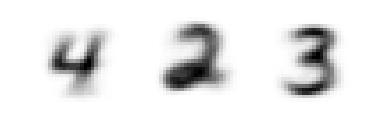

iteration 6


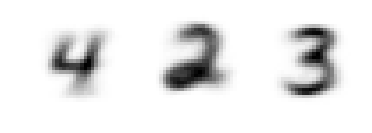

iteration 7


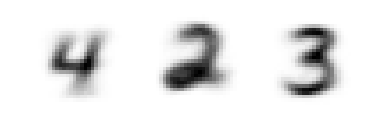

iteration 8


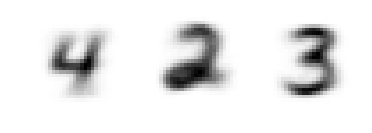

stop because of convergence after 8 iterations



8 iterations in 0.026117094357808433 min





In [10]:
# YOUR CODE HERE
######################## ######################## ########################

# fast version: only use part of the data
bin_zip = zip(bin_train_data[:5000], train_labels[:5000])

X = np.array([i for i,n in bin_zip if any([n==2, n==3, n==4])])

K = 3
epochs = 10
mu,pi = EM(X,K,epochs,plotting=True)

######################## ######################## ########################

Can you identify which element in the latent space corresponds to which digit? What are the identified mixing coefficients for digits $2$, $3$ and $4$, and how do these compare to the true ones?

YOUR ANSWER HERE

Yes, we can identify which element in the latent space corresponds to which digit, as there is one element for each of the digits $2,3$ and $4$.

The mixing coefficients for the digits are $0.35, 0.30, 0.35$. This is slightly different to the true values, where each number should appear $\frac{1}{3}$ of the time.

In [11]:
print(pi)

[0.34954996 0.29628561 0.35416443]


### 1.4 Experiments (20 points)
Perform the follow-up experiments listed below using your implementation of the EM algorithm. For each of these, describe/comment on the obtained results and give an explanation. You may still use your dataset with only digits 2, 3 and 4 as otherwise computations can take very long.

#### 1.4.1 Size of the latent space (5 points)
Run EM with $K$ larger or smaller than the true number of classes. Describe your results.

initialize EM

initialize mu:


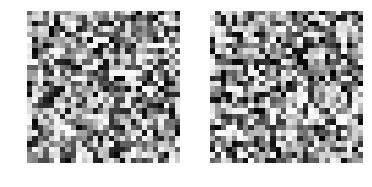


iteration 1


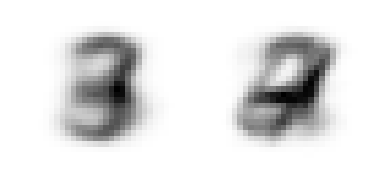

iteration 2


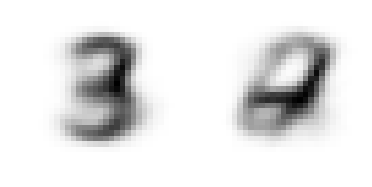

iteration 3


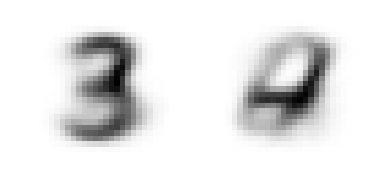

iteration 4


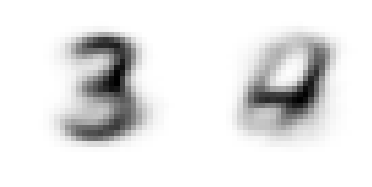

iteration 5


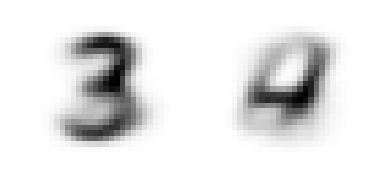

iteration 6


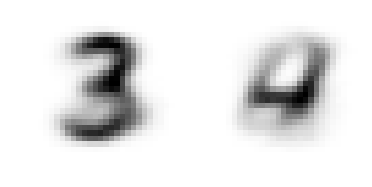

iteration 7


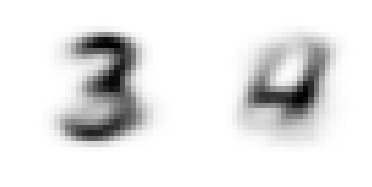

iteration 8


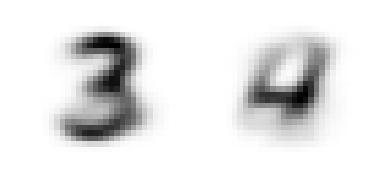

iteration 9


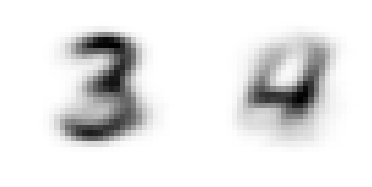

iteration 10


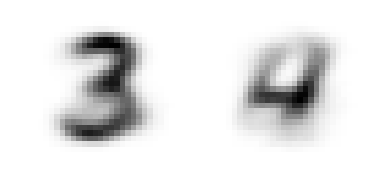




10 iterations in 0.022817269961039225 min





In [12]:
# YOUR CODE HERE
######################## ######################## ########################

# smaller
K = 2
_, _ = EM(X,K,epochs,plotting=True)  

######################## ######################## ########################

###YOUR ANSWER HERE

When we use $K=2$, the latent space can only represent two different classes, while there are still three classes present. As a result, the latent representation starts mixing the representations for the different numbers. We can see this especially for the digits $2$ and $4$, which are merged into a joined representation. Additionally, we can see that in contrast to the setting with three classes in the latent space, the algorithm fails to converge within ten epochs.

initialize EM

initialize mu:


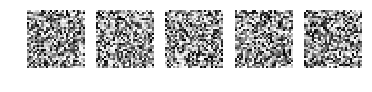


iteration 1


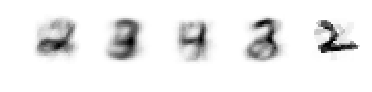

iteration 2


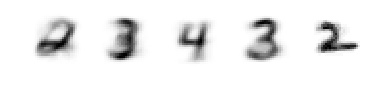

iteration 3


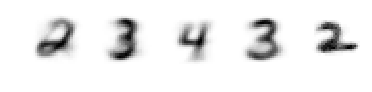

iteration 4


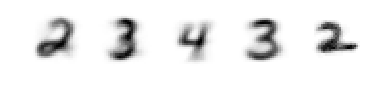

iteration 5


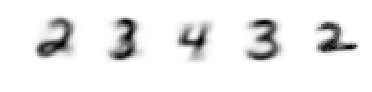

iteration 6


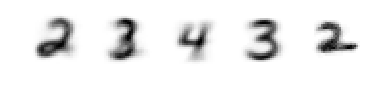

iteration 7


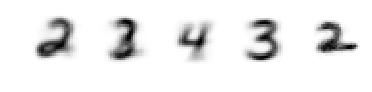

iteration 8


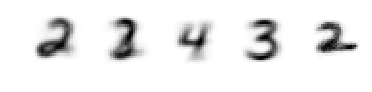

iteration 9


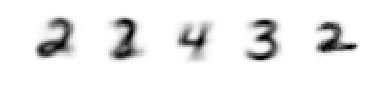

iteration 10


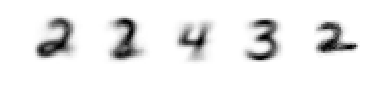




10 iterations in 0.051415483156840004 min





In [13]:
# YOUR CODE HERE
######################## ######################## ########################

# larger
K = 5
_, _ = EM(X,K,epochs,plotting=True)  

######################## ######################## ########################

###YOUR ANSWER HERE

When we use $K=5$, the latent space can represent five different classes, while there are still three classes present. As a result, the latent representation starts splitting the representations of the given numbers. We can see this especially for the digits $2$ and $3$. For the $2$, we can see that we learn two depictions: one which encompasses a distinctive loop, while the other does not. For the $3$, we get one representation that is squeezed more than the other and one of them seems to be mixed with a representation of the digit two.

#### 1.4.2 Identify misclassifications (10 points)
How can you use the data labels to assign a label to each of the clusters/latent variables? Use this to identify images that are 'misclassified' and try to understand why they are. Report your findings.

True label - predicted label:


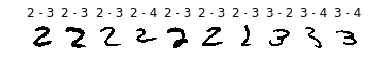

Comparing to the mus found using EM:


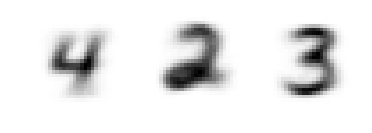

In [14]:
# YOUR CODE HERE
######################## ######################## ########################

def get_true_mu(bin_train_data,train_labels):

    true_mu = np.zeros((3,bin_train_data.shape[1]))
    
    for i in range(2,5):
        #find indices of images belonging to this label
        indx = np.argwhere(train_labels==i)
    
        # average over these images
        true_mu[i-2] = np.average(bin_train_data[indx],axis=0)

    return true_mu


def classify_image(image, mu):
    """
    takes image and mu as an input and maps the image to the closest mu
    """
    
    # L1 distance between mu and image
    dist = np.zeros((mu.shape[0],))
    for c in range(mu.shape[0]):
        dist[c] = numpy.linalg.norm(image-mu[c])
    
    # minimal distance is class
    classification = np.argmin(dist)
    
    return classification


def find_misclassification(mu, bin_train_data, train_labels, number_mc = 5):    
    
    #find true labels of the latent space
    true_mu = get_true_mu(bin_train_data,train_labels)
    
    mu_label = np.zeros((mu.shape[0],))
    for i in range(len(mu)):
        mu_label[i] = classify_image(mu[i], true_mu) + 2
          
    #initializing arrays to save the misclassified results
    mc_pic = np.zeros((number_mc,mu.shape[1]))
    mc_pred = np.zeros((number_mc,))
    mc_label = np.zeros((number_mc,))
    i = 0
    mc_counter = 0

    while mc_counter < number_mc:        
        if train_labels[i] >= 2 and train_labels[i] <= 4:      ## only consider images with true labels 2, 3 or 4
            c_pred = mu_label[classify_image(bin_train_data[i], mu)]
    
            if c_pred != train_labels[i]:
              mc_pic[mc_counter] = bin_train_data[i]
              mc_pred[mc_counter] = c_pred
              mc_label[mc_counter] = train_labels[i]
              mc_counter = mc_counter + 1
        i = i + 1    
   
    print('True label - predicted label:')
    for j in range(number_mc):
        plt.subplot(1,number_mc,j+1)
        plt.imshow(mc_pic[j].reshape(28,28), interpolation = 'nearest',
                   cmap ='Greys')
        plt.title("{0:d} - {1:d}".format(int(mc_label[j]), int(mc_pred[j])))
        plt.axis('off')
    plt.show()
    
# using mu from the run above with the correct number of classes

find_misclassification(mu, bin_train_data, train_labels, number_mc=10)
print('Comparing to the mus found using EM:')
plot_MNIST_digits(mu)

######################## ######################## ########################

YOUR ANSWER HERE

We can use the data labels in order to calculate the true values of the mus by averaging over all images that are assigned with this label. Then, we compare these true values to the mus we found using the EM-algorithm and label them with the according label if they show the smallest difference between one another.

Using the same technique, we can label the images of the dataset by comparing the to the mus we found using the EM-algorithm and assigning them with the correponding label of the most similar one.  Comparing our result to the true labels, gives us a number of misclassifications as shown above.

We can see that a lot of twos get misclassified, especially if they do not encompass the loop as it is present in the latent representation. We can conclude that in general samples that are too different from the latent representation will be misclassified.

#### 1.4.3 Initialize with true values (5 points)
Initialize the three classes with the true values of the parameters and see what happens. Report your results.

initialize EM

initialize mu:


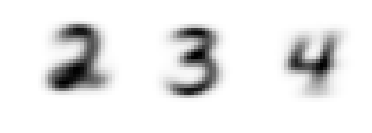


iteration 1


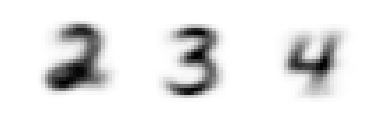

iteration 2


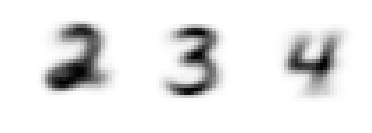

iteration 3


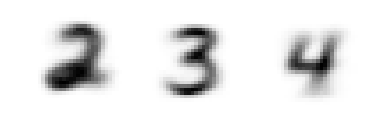

stop because of convergence after 3 iterations



3 iterations in 0.009675459067026774 min





In [15]:
# YOUR CODE HERE
######################## ######################## ########################

K = 3
true_mu = get_true_mu(bin_train_data,train_labels)
_, _ = EM(X,K,epochs,mu = true_mu, plotting=True)  

######################## ######################## ########################

YOUR ANSWER HERE

When we initialize with the true values for mu, we can see that the algorithm changes this representation only marginally. For example, the loop of the two slightly increases. The algorithm manages to converge within 3 epochs.

## Part 2: Variational Auto-Encoder

A Variational Auto-Encoder (VAE) is a probabilistic model $p(\bx, \bz)$ over observed variables $\bx$ and latent variables and/or parameters $\bz$. Here we distinguish the decoder part, $p(\bx | \bz) p(\bz)$ and an encoder part $p(\bz | \bx)$ that are both specified with a neural network. A lower bound on the log marginal likelihood $\log p(\bx)$ can be obtained by approximately inferring the latent variables z from the observed data x using an encoder distribution $q(\bz| \bx)$ that is also specified as a neural network. This lower bound is then optimized to fit the model to the data. 

The model was introduced by Diederik Kingma (during his PhD at the UVA) and Max Welling in 2013, https://arxiv.org/abs/1312.6114. 

Since it is such an important model there are plenty of well written tutorials that should help you with the assignment. E.g: https://jaan.io/what-is-variational-autoencoder-vae-tutorial/.

In the following, we will make heavily use of the torch module, https://pytorch.org/docs/stable/index.html. Most of the time replacing `np.` with `torch.` will do the trick, e.g. `np.sum` becomes `torch.sum` and `np.log` becomes `torch.log`. In addition, we will use `torch.FloatTensor()` as an equivalent to `np.array()`. In order to train our VAE efficiently we will make use of batching. The number of data points in a batch will become the first dimension of our data tensor, e.g. A batch of 128 MNIST images has the dimensions [128, 1, 28, 28]. To check check the dimensions of a tensor you can call `.size()`.

### 2.1 Loss function
The objective function (variational lower bound), that we will use to train the VAE, consists of two terms: a log Bernoulli loss (reconstruction loss) and a Kullback–Leibler divergence. We implement the two terms separately and combine them in the end.
As seen in Part 1: Expectation Maximization, we can use a multivariate Bernoulli distribution to model the likelihood $p(\bx | \bz)$ of black and white images. Formally, the variational lower bound is maximized but in PyTorch we are always minimizing therefore we need to calculate the negative log Bernoulli loss and Kullback–Leibler divergence.

### 2.1.1 Negative Log Bernoulli loss (5 points)
The negative log Bernoulli loss is defined as,

\begin{align}
loss = - (\sum_i^D \bx_i \log \hat{\bx_i} + (1 − \bx_i) \log(1 − \hat{\bx_i})).
\end{align}

Write a function `log_bernoulli_loss` that takes a D dimensional vector `x`, its reconstruction `x_hat` and returns the negative log Bernoulli loss. Make sure that your function works for batches of arbitrary size.

In [16]:
def log_bernoulli_loss(x_hat, x):
    
    # YOUR CODE HERE
    ######################## ######################## ########################
    
    n = torch.mul(x, torch.log(x_hat)) + torch.mul(1 - x, torch.log(1 - x_hat))
    loss = -n.sum()
    
    ######################## ######################## ########################
    return loss


In [17]:
### Test test test
x_test = torch.FloatTensor([[0.1, 0.2, 0.3, 0.4], [0.5, 0.6, 0.7, 0.8], [0.9, 0.9, 0.9, 0.9]])
x_hat_test = torch.FloatTensor([[0.11, 0.22, 0.33, 0.44], [0.55, 0.66, 0.77, 0.88], [0.99, 0.99, 0.99, 0.99]])

assert log_bernoulli_loss(x_hat_test, x_test) > 0.0
assert log_bernoulli_loss(x_hat_test, x_test) < 10.0


### 2.1.2 Negative Kullback–Leibler divergence (10 Points)
The variational lower bound (the objective to be maximized) contains a KL term $D_{KL}(q(\bz)||p(\bz))$ that can often be calculated analytically. In the VAE we assume $q = N(\bz, \mu, \sigma^2I)$ and $p = N(\bz, 0, I)$. Solve analytically!

YOUR ANSWER HERE


\begin{align*} 
\newcommand{\xscalar}{x}
\newcommand{\xvec}{{\bf z}}
\newcommand{\Lmat}{{\sigma^2 \bf I}}
\newcommand{\Sigmamat}{\bf I}
\newcommand{\SigmamatInv}{\Sigmamat^{-1}}
\newcommand{\mvec}{\boldsymbol{\mu}}
        \mathcal{KL}(q||p) &= - \int q(\xvec) \log \left(\frac{p(\xvec)}{q(\xvec)}\right) d\xvec \\
        &= \int q(\xvec) \log (p(\xvec) - q(\xvec)) d\xvec \\        
        &= \int q(\xvec) [ - \frac{D}{2} \log(2\pi) - \frac{1}{2} \log(|\Sigmamat|) - \frac{1}{2} (\xvec)^T \SigmamatInv(\xvec) \\
        & + \frac{D}{2} \log(2\pi) + \frac{1}{2} \log(|\Lmat|) + \frac{1}{2} (\xvec-\mvec)^T \Lmat^{-1}(\xvec-\mvec) ] d\xvec \\
        &= \frac{1}{2} \log \left(\frac{|\Lmat|}{|\Sigmamat|}\right) \int q(\xvec) d\xvec \int q(\xvec) [ - \frac{1}{2} (\xvec)^T \SigmamatInv(\xvec) \\
        & + \frac{1}{2} (\xvec-\mvec)^T \Lmat^{-1}(\xvec-\mvec) ] d\xvec
    \end{align*}
    We use $\int q(\xvec) d\xvec = 1$ and the law of the unconscious statistician to get   
    \begin{align*}
        &= \frac{1}{2} \log \left(\frac{|\Lmat|}{|\Sigmamat|}\right) - \frac{1}{2} \mathbb{E}[ (\xvec)^T \SigmamatInv(\xvec)] + 
        \frac{1}{2} \mathbb{E}[(\xvec-\mvec)^T \Lmat^{-1}(\xvec-\mvec)]  
    \end{align*}
    Since $p$ is considered to be the original distribution, it follows that $\xvec \sim \mathcal{N}(\xvec|0, \Sigmamat)$. Therefore, we can use equation 380 from the matrix cookbook to get:  
    \begin{align*}
        &= \frac{1}{2} \log \left(\frac{|\Lmat|}{|\Sigmamat|}\right) - \frac{1}{2}[\SigmamatInv + Tr(\SigmamatInv\Sigmamat)] \\
        & + \frac{1}{2}[(-\mvec)^T \Lmat^{-1}(-\mvec) + Tr(\Lmat^{-1}\Sigmamat)] \\
        &= \frac{1}{2} \left[\log \left(\frac{|\Lmat|}{|\Sigmamat|}\right) - Tr(\Sigmamat)+ (-\mvec)^T \Lmat^{-1}(-\mvec) + Tr(\Lmat^{-1}\Sigmamat)\right] \\
        &= \frac{1}{2} \left[\log \left(\frac{|\Lmat|}{|\Sigmamat|}\right) - D + (-\mvec)^T \Lmat^{-1}(-\mvec) + Tr(\Lmat^{-1}\Sigmamat)\right]\\
        \end{align*}

Write a function `KL_loss` that takes two J dimensional vectors `mu` and `logvar` and returns the negative Kullback–Leibler divergence. Where `logvar` is $\log(\sigma^2)$. Make sure that your function works for batches of arbitrary size.

In [18]:
def KL_loss(mu, logvar):
    
    # YOUR CODE HERE
    ######################## ######################## ########################
    
    loss = -0.5 * torch.sum(1 + logvar - torch.pow(mu, 2) - torch.exp(logvar))
    
    ######################## ######################## ########################
    return loss


In [19]:
### Test test test
mu_test = torch.FloatTensor([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
logvar_test = torch.FloatTensor([[0.01, 0.02], [0.03, 0.04], [0.05, 0.06]])

assert KL_loss(mu_test, logvar_test) > 0.0
assert KL_loss(mu_test, logvar_test) < 10.0


### 2.1.3 Putting the losses together (5 points)
Write a function `loss_function` that takes a D dimensional vector `x`, its reconstruction `x_hat`, two J dimensional vectors `mu` and `logvar` and returns the final loss. Make sure that your function works for batches of arbitrary size.

In [20]:
def loss_function(x_hat, x, mu, logvar):
    
    # YOUR CODE HERE
    ######################## ######################## ########################
           
    entropy_loss = log_bernoulli_loss(x_hat, x)
    kl_loss = KL_loss(mu,logvar)
    loss = entropy_loss+kl_loss    
    
    ######################## ######################## ########################
    
    return loss


In [21]:
x_test = torch.FloatTensor([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6], [0.7, 0.8, 0.9]])
x_hat_test = torch.FloatTensor([[0.11, 0.22, 0.33], [0.44, 0.55, 0.66], [0.77, 0.88, 0.99]])
mu_test = torch.FloatTensor([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
logvar_test = torch.FloatTensor([[0.01, 0.02], [0.03, 0.04], [0.05, 0.06]])

assert loss_function(x_hat_test, x_test, mu_test, logvar_test) > 0.0
assert loss_function(x_hat_test, x_test, mu_test, logvar_test) < 10.0


### 2.2 The model
Below you see a data structure for the VAE. The modell itself consists of two main parts the encoder (images $\bx$ to latent variables $\bz$) and the decoder (latent variables $\bz$ to images $\bx$). The encoder is using 3 fully-connected layers, whereas the decoder is using fully-connected layers. Right now the data structure is quite empty, step by step will update its functionality. For test purposes we will initialize a VAE for you. After the data structure is completed you will do the hyperparameter search.


In [22]:
from torch import nn
from torch.nn import functional as F 

class VAE(nn.Module):
    def __init__(self, fc1_dims, fc21_dims, fc22_dims, fc3_dims, fc4_dims):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(*fc1_dims)
        self.fc21 = nn.Linear(*fc21_dims)
        self.fc22 = nn.Linear(*fc22_dims)
        self.fc3 = nn.Linear(*fc3_dims)
        self.fc4 = nn.Linear(*fc4_dims)

    def encode(self, x):
        # To be implemented
        raise Exception('Method not implemented')

    def reparameterize(self, mu, logvar):
        # To be implemented
        raise Exception('Method not implemented')

    def decode(self, z):
        # To be implemented
        raise Exception('Method not implemented')

    def forward(self, x):
        # To be implemented
        raise Exception('Method not implemented')

VAE_test = VAE(fc1_dims=(784, 4), fc21_dims=(4, 2), fc22_dims=(4, 2), fc3_dims=(2, 4), fc4_dims=(4, 784))


### 2.3 Encoding (10 points)
Write a function `encode` that gets a vector `x` with 784 elements (flattened MNIST image) and returns `mu` and `logvar`. Your function should use three fully-connected layers (`self.fc1()`, `self.fc21()`, `self.fc22()`). First, you should use `self.fc1()` to embed `x`. Second, you should use `self.fc21()` and `self.fc22()` on the embedding of `x` to compute `mu` and `logvar` respectively. PyTorch comes with a variety of activation functions, the most common calls are `F.relu()`, `F.sigmoid()`, `F.tanh()`. Make sure that your function works for batches of arbitrary size.  

In [23]:
def encode(self, x):
    
    # YOUR CODE HERE
    ######################## ######################## ########################
    
    z = F.relu(self.fc1(x))
    mu = self.fc21(z)
    logvar = self.fc22(z)
    
    ######################## ######################## ########################
    
    return mu, logvar


In [24]:
### Test, test, test
VAE.encode = encode

x_test = torch.ones((5,784))
mu_test, logvar_test = VAE_test.encode(x_test)

assert np.allclose(mu_test.size(), [5, 2])
assert np.allclose(logvar_test.size(), [5, 2])


### 2.4 Reparameterization (10 points)
One of the major question that the VAE is answering, is 'how to take derivatives with respect to the parameters of a stochastic variable?', i.e. if we are given $\bz$ that is drawn from a distribution $q(\bz|\bx)$, and we want to take derivatives. This step is necessary to be able to use gradient-based optimization algorithms like SGD.
For some distributions, it is possible to reparameterize samples in a clever way, such that the stochasticity is independent of the parameters. We want our samples to deterministically depend on the parameters of the distribution. For example, in a normally-distributed variable with mean $\mu$ and standard deviation $\sigma$, we can sample from it like this:

\begin{align}
\bz = \mu + \sigma \odot \epsilon,
\end{align}

where $\odot$ is the element-wise multiplication and $\epsilon$ is sampled from $N(0, I)$.


Write a function `reparameterize` that takes two J dimensional vectors `mu` and `logvar`. It should return $\bz = \mu + \sigma \odot \epsilon$.


In [25]:
def reparameterize(self, mu, logvar):

    # YOUR CODE HERE
    ######################## ######################## ########################

    sigma = torch.sqrt(torch.exp(logvar))
    z = mu + sigma * torch.randn(mu.size())

    ######################## ######################## ########################
    return z


In [26]:
### Test, test, test
VAE.reparameterize = reparameterize
VAE_test.train()

mu_test = torch.FloatTensor([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
logvar_test = torch.FloatTensor([[0.01, 0.02], [0.03, 0.04], [0.05, 0.06]])

z_test = VAE_test.reparameterize(mu_test, logvar_test)

assert np.allclose(z_test.size(), [3, 2])
assert z_test[0][0] < 5.0
assert z_test[0][0] > -5.0


### 2.5 Decoding (10 points)
Write a function `decode` that gets a vector `z` with J elements and returns a vector `x_hat` with 784 elements (flattened MNIST image). Your function should use two fully-connected layers (`self.fc3()`, `self.fc4()`). PyTorch comes with a variety of activation functions, the most common calls are `F.relu()`, `F.sigmoid()`, `F.tanh()`. Make sure that your function works for batches of arbitrary size.

In [27]:
def decode(self, z):
    
    # YOUR CODE HERE
    ######################## ######################## ########################
    
    out3 = F.relu(self.fc3(z))
    x_hat = F.sigmoid(self.fc4(out3))
    
    ######################## ######################## ########################
    return x_hat


In [28]:
# test test test
VAE.decode = decode

z_test = torch.ones((5,2))
x_hat_test = VAE_test.decode(z_test)

assert np.allclose(x_hat_test.size(), [5, 784])
assert (x_hat_test <= 1).all()
assert (x_hat_test >= 0).all()


### 2.6 Forward pass (10)
To complete the data structure you have to define a forward pass through the VAE. A single forward pass consists of the encoding of an MNIST image $\bx$ into latent space $\bz$, the reparameterization of $\bz$ and the decoding of $\bz$ into an image $\bx$.

Write a function `forward` that gets a a vector `x` with 784 elements (flattened MNIST image) and returns a vector `x_hat` with 784 elements (flattened MNIST image), `mu` and `logvar`.

In [29]:
def forward(self, x):
    x = x.view(-1, 784)
    
    # YOUR CODE HERE
    ######################## ######################## ########################
    mu, logvar = self.encode(x)
    z = self.reparameterize(mu, logvar)
    x_hat = self.decode(z)
    
    ######################## ######################## ########################
    return x_hat, mu, logvar


In [30]:
# test test test 
VAE.forward = forward

x_test = torch.ones((5,784))
x_hat_test, mu_test, logvar_test = VAE_test.forward(x_test)

assert np.allclose(x_hat_test.size(), [5, 784])
assert np.allclose(mu_test.size(), [5, 2])
assert np.allclose(logvar_test.size(), [5, 2])


### 2.7 Training (15)
We will now train the VAE using an optimizer called Adam, https://arxiv.org/abs/1412.6980. The code to train a model in PyTorch is given below.

In [31]:
from torch.autograd import Variable

def train(epoch, train_loader, model, optimizer):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = Variable(data)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data.view(-1, 784), mu, logvar)
        loss.backward()
        train_loss += loss.data
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.data / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))


Let's train. You have to choose the hyperparameters. Make sure your loss is going down in a reasonable amount of epochs (around 10).

In [32]:
# Hyperparameters
# fc1_dims = (?,?)
# fc21_dims =
# fc22_dims =
# fc3_dims =
# fc4_dims =
# lr =
# batch_size =
# epochs =

# YOUR CODE HERE
######################## ######################## ########################
# using the parameters as given in: https://github.com/pytorch/examples/tree/master/vae 
fc1_dims = (784,400)
fc21_dims = (400,20)
fc22_dims = (400,20)
fc3_dims = (20,400)
fc4_dims = (400,784)
lr = 1e-3
batch_size = 128
epochs = 10
######################## ######################## ########################

In [33]:
# This cell contains a hidden test, please don't delete it, thx

Run the box below to train the model using the hyperparameters you entered above.

In [34]:
from torchvision import datasets, transforms
from torch import nn, optim

# Load data
train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, shuffle=True, **{})

# Init model
VAE_MNIST = VAE(fc1_dims=fc1_dims, fc21_dims=fc21_dims, fc22_dims=fc22_dims, fc3_dims=fc3_dims, fc4_dims=fc4_dims)

# Init optimizer
optimizer = optim.Adam(VAE_MNIST.parameters(), lr=lr)

# Train
for epoch in range(1, epochs + 1):
    train(epoch, train_loader, VAE_MNIST, optimizer)


Train Epoch: 1 [0/60000 (0%)]	Loss: 549.927795
Train Epoch: 1 [12800/60000 (21%)]	Loss: 187.774139
Train Epoch: 1 [25600/60000 (43%)]	Loss: 151.297928
Train Epoch: 1 [38400/60000 (64%)]	Loss: 135.530563
Train Epoch: 1 [51200/60000 (85%)]	Loss: 133.712051
====> Epoch: 1 Average loss: 162.9749
Train Epoch: 2 [0/60000 (0%)]	Loss: 129.225845
Train Epoch: 2 [12800/60000 (21%)]	Loss: 124.249214
Train Epoch: 2 [25600/60000 (43%)]	Loss: 119.403214
Train Epoch: 2 [38400/60000 (64%)]	Loss: 117.094475
Train Epoch: 2 [51200/60000 (85%)]	Loss: 110.436165
====> Epoch: 2 Average loss: 120.6739
Train Epoch: 3 [0/60000 (0%)]	Loss: 114.500031
Train Epoch: 3 [12800/60000 (21%)]	Loss: 111.776672
Train Epoch: 3 [25600/60000 (43%)]	Loss: 114.054794
Train Epoch: 3 [38400/60000 (64%)]	Loss: 111.648720
Train Epoch: 3 [51200/60000 (85%)]	Loss: 111.599319
====> Epoch: 3 Average loss: 114.1491
Train Epoch: 4 [0/60000 (0%)]	Loss: 110.490540
Train Epoch: 4 [12800/60000 (21%)]	Loss: 111.640862
Train Epoch: 4 [25600/

Run the box below to check if the model you trained above is able to correctly reconstruct images.

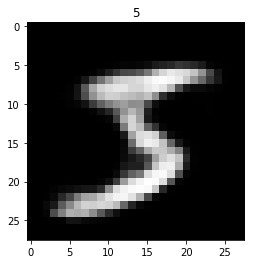

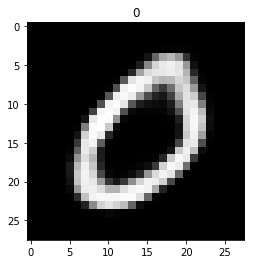

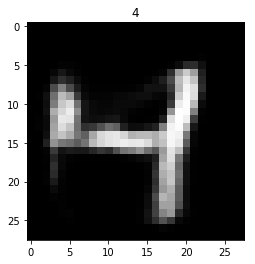

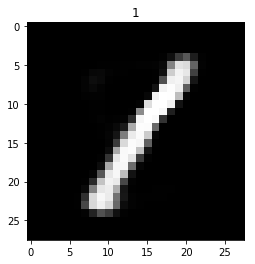

In [35]:
### Let's check if the reconstructions make sense
# Set model to test mode
VAE_MNIST.eval()
    
# Reconstructed
train_data_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_plot = torch.utils.data.DataLoader(train_data_plot,
                                           batch_size=1, shuffle=False, **{})

for batch_idx, (data, _) in enumerate(train_loader_plot):
    x_hat, mu, logvar = VAE_MNIST(data)
    plt.imshow(x_hat.view(1,28,28).squeeze().data.numpy(), cmap='gray')
    plt.title('%i' % train_data.train_labels[batch_idx])
    plt.show()
    if batch_idx == 3:
        break


### 2.8 Visualize latent space (20 points)
Now, implement the auto-encoder now with a 2-dimensional latent space, and train again over the MNIST data. Make a visualization of the learned manifold by using a linearly spaced coordinate grid as input for the latent space, as seen in  https://arxiv.org/abs/1312.6114 Figure 4.

In [36]:
# YOUR CODE HERE
######################## ######################## ########################
fc1_dims = (784,400)
fc21_dims = (400,2)
fc22_dims = (400,2)
fc3_dims = (2,400)
fc4_dims = (400,784)
lr = 1e-3
batch_size = 128
epochs = 10

# Init model
VAE_MNIST = VAE(fc1_dims=fc1_dims, fc21_dims=fc21_dims, fc22_dims=fc22_dims, fc3_dims=fc3_dims, fc4_dims=fc4_dims)

# Init optimizer
optimizer = optim.Adam(VAE_MNIST.parameters(), lr=lr)

# Train
for epoch in range(1, epochs + 1):
    train(epoch, train_loader, VAE_MNIST, optimizer)

######################## ######################## ########################

Train Epoch: 1 [0/60000 (0%)]	Loss: 547.188660
Train Epoch: 1 [12800/60000 (21%)]	Loss: 190.724518
Train Epoch: 1 [25600/60000 (43%)]	Loss: 183.475037
Train Epoch: 1 [38400/60000 (64%)]	Loss: 178.626740
Train Epoch: 1 [51200/60000 (85%)]	Loss: 181.308685
====> Epoch: 1 Average loss: 190.5039
Train Epoch: 2 [0/60000 (0%)]	Loss: 173.734924
Train Epoch: 2 [12800/60000 (21%)]	Loss: 171.191605
Train Epoch: 2 [25600/60000 (43%)]	Loss: 172.238831
Train Epoch: 2 [38400/60000 (64%)]	Loss: 155.479813
Train Epoch: 2 [51200/60000 (85%)]	Loss: 168.183075
====> Epoch: 2 Average loss: 166.9514
Train Epoch: 3 [0/60000 (0%)]	Loss: 170.649994
Train Epoch: 3 [12800/60000 (21%)]	Loss: 162.990494
Train Epoch: 3 [25600/60000 (43%)]	Loss: 158.472961
Train Epoch: 3 [38400/60000 (64%)]	Loss: 166.178955
Train Epoch: 3 [51200/60000 (85%)]	Loss: 159.786560
====> Epoch: 3 Average loss: 163.5314
Train Epoch: 4 [0/60000 (0%)]	Loss: 162.653625
Train Epoch: 4 [12800/60000 (21%)]	Loss: 167.145065
Train Epoch: 4 [25600/

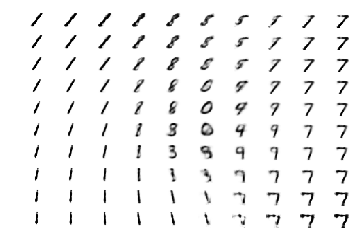

In [39]:
######################## ######################## ########################

VAE_MNIST.eval()

size = 5
f, axarr = plt.subplots(size*2,size*2)

for i in range(-size,size):
    for j in range(-size,size):
        pos = torch.zeros((1,2))
        pos[0,0] = i
        pos[0,1] = j
        x_hat = VAE_MNIST.decode(torch.autograd.Variable(pos))
        axarr[i+size,j+size].imshow(x_hat.view(1,28,28).squeeze().data.numpy(), interpolation = 'nearest',
                       cmap ='Greys')
        axarr[i+size,j+size].axis('off')
    
plt.show()
        
######################## ######################## ########################

### 2.8 Amortized inference (10 points)
What is amortized inference? Where in the code of Part 2 is it used? What is the benefit of using it?


YOUR ANSWER HERE

In amortized inference, we share the variational parameters $\lambda$ across datapoints. In the Variational Autoencoder in Part 2, this is the case, since we use the same parameters, i.e. the same weights and biases in the encoding network, for all datapoints, i.e. samples from the dataset.

If we see a new datapoint, we can use the learned network in order to approximate its posterior $q(z)$, which can be an advantage over the alternative mean-field approach, where we would have to run variational inference for each new datapoint again.